In [24]:
%matplotlib inline

from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [25]:
def ode_solver(f, x0, xend, y0, h, method):
    # Generic solver for ODEs
    #    y' = f(x,y), y(a)=y0
    # Input: f, the integration interval x0 and xend, 
    #        the stepsize h and the method of choice.  
    #   
    # Output: Arrays with the x- and the corresponding y-values. 
    
    # Initializing:
    y_num = array([y0])    # Array for the solution y 
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for x and y
    yn = y0 

    # Main loop
    while xn < xend - 1.e-10:            # Buffer for truncation errors        
        xn, yn = method(f, xn, yn, h)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num,xn)
        
    return x_num, y_num

In [28]:
def heun(f, x, y, h):
    # One step of Heun's method
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_next = y + 0.5*h*(k1+k2)
    x_next = x + h
    return x_next, y_next

### Oppgave 3 b) c)
Verifiserer numerisk

y0 og y1:
[[0.       1.       1.       0.      ]
 [0.095    0.871875 1.005    0.128125]]
[[ 0.          1.          1.          0.        ]
 [ 0.095       0.871875    1.005       0.128125  ]
 [ 0.17314859  0.43918885  1.02685141  0.56081115]
 [-0.12095349 -2.94128949  1.42095349  3.94128949]
 [-0.415188   -2.94339924  1.815188    3.94339924]
 [-0.70963334 -2.94550641  2.20963334  3.94550641]
 [-1.00428928 -2.94761101  2.60428928  3.94761101]
 [-1.29915554 -2.94971304  2.99915554  3.94971304]
 [-1.59423189 -2.95181251  3.39423189  3.95181251]
 [-1.88951805 -2.95390943  3.78951805  3.95390943]
 [-2.18501377 -2.9560038   4.18501377  3.9560038 ]]


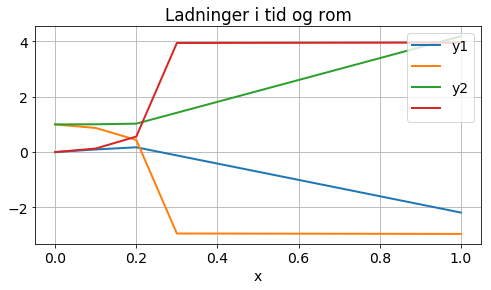

In [43]:
def f(x, y):
    return array(
        [
            y[1],
            -1 / (y[1]-y[3]) ** 2,
            y[3],
            1 / (y[1]-y[3]) ** 2,
        ]
    )

x0, xend = 0, 1
y0 = array([0, 1, 1, 0])

# Solve the equation
x_lv, y_lv = ode_solver(f, x0, xend, y0, h=0.1, method=heun)

# Printer ut y0 og y1
print('y0 og y1:')
print(y_lv[:2])

print(y_lv)

# Plot the solution
plot(x_lv, y_lv);
xlabel('x')
title('Ladninger i tid og rom')
grid(True)
legend(['y1', '', 'y2', ''],loc=1);

Ser at ladning 1 har en hastighet på 1 i retning ladning 2, men det ser ut til at de har lik ladning fordi de frastøter hverandre. Når avstanden mellom ladningene øker faller akselerasjonen fort, noe som gir mening da differansen er kvadrert i uttrykket.

### Oppgave 4 a)

In [52]:
def lotka_volterra(x, y):
    alpha, beta, delta, gamma = 2, 1, 0.5, 1
    dy = array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

In [45]:
def rk4(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    
    y_next = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    x_next = x + h
    return x_next, y_next

In [59]:
# Test the order of a method, given a test equation with exact solution
def f1(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h = 0.1
x0, xend= 0, 1
y0 = 1

print('h           error          order \n----------------------------------')
 
for n in range(8):
    x_num, y_num = ode_solver(f1, x0, xend, y0, h, rk4)    
    error = norm(y_eksakt(xend)-y_num[-1])       # Error in the end point
    if n is 0:                 
        order = NaN          # Nothing to compare              
    else:
        order = log2(error_old/error)     # Calculate  the order p
    print(format('{:.3e}   {:.3e}   {:7.2f}'.format( h, error, order))) 
    h = 0.5*h               # Reduce the stepsize
    error_old = error 

h           error          order 
----------------------------------
1.000e-01   1.625e-06       nan
5.000e-02   1.025e-07      3.99
2.500e-02   6.407e-09      4.00
1.250e-02   3.999e-10      4.00
6.250e-03   2.497e-11      4.00
3.125e-03   1.559e-12      4.00
1.563e-03   9.520e-14      4.03
7.813e-04   8.549e-15      3.48


Ser at feilen faller med en faktor på ca 16 (2\**4) hver gang man halverer skrittlengden, altså er metoden av 4. orden.

### Oppgave 4 b)

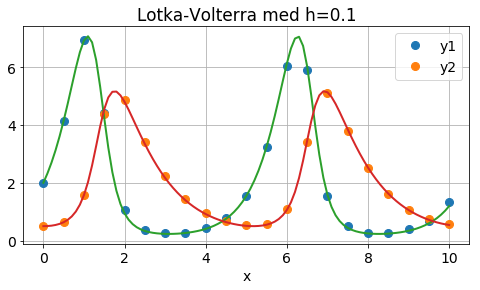

In [50]:
f = lotka_volterra
x0, xend = 0, 10
y0 = array([2, 0.5])
h = 0.5

x_lv, y_lv = ode_solver(f, x0, xend, y0, h, rk4)
plot(x_lv,y_lv, 'o');
xlabel('x')
title('Lotka-Volterra med h=0.5')
legend(['y1','y2'],loc=1);

h = 0.1

x_lv, y_lv = ode_solver(f, x0, xend, y0, h, rk4)
plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra med h=0.1')
legend(['y1','y2'],loc=1);

Ser at det er en ganske betydelig forskjell på feilen i de områder hvor den 2. deriverte er stor i absoluttverdi.

##### Løst med Heuns:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


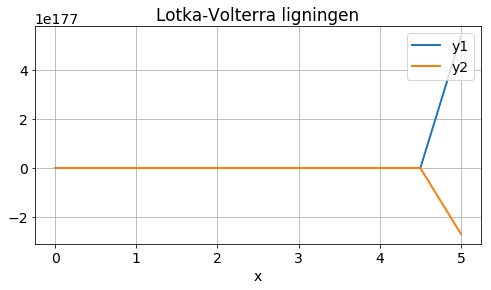

In [57]:
f = lotka_volterra
x0, xend = 0, 10
y0 = array([2, 0.5])
h = 0.5

x_lv, y_lv = ode_solver(f, x0, xend, y0, h, heun)
plot(x_lv, y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'], loc=1);

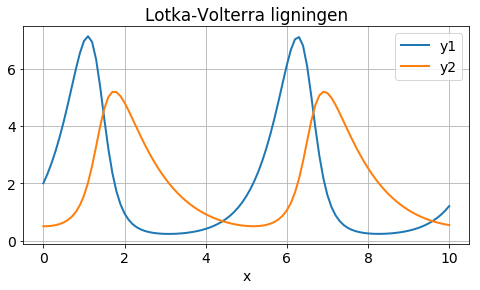

In [58]:
h = 0.1

x_lv, y_lv = ode_solver(f, x0, xend, y0, h, heun)
plot(x_lv, y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'], loc=1);

Ser at Heuns metode ikke finner frem til noen løsning med h=0.5, mens den finner en løsning for h=0.1, altså krever Heuns at man bruker kortere steglengde enn for RK4